In [1]:
pip install pandas numpy matplotlib seaborn scipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install prettytable

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install --upgrade seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install dash dash-core-components dash-html-components dash-table plotly


Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install dash dash-renderer dash-html-components dash-core-components plotly

Note: you may need to restart the kernel to use updated packages.


In [376]:
pip install dash dash-bootstrap-components dash-table

Note: you may need to restart the kernel to use updated packages.


In [377]:
pip install dash plotly


Note: you may need to restart the kernel to use updated packages.


Age,Gender,Location,RTU is a Good School,The Facility of RTU is promising,BS Satatistics is Easy
15,Male,Manila,Agree,Strongly Agree,Disagree
18,Female,Cavite,Disagree,Agree,Strongly Agree


YES


Enter the directory path of your survey data file: /Users/rolanddelarosa/Desktop/FoodVlogData.xlsx
Enter the number of columns with demographics of the respondents [for example, age, gender, and/or location]: 0



<font color='red'><b>Error:</b> Number of personal info/demographics columns should be greater than 0 and less than the total columns. Please enter a valid number.</font>

Enter the number of columns with demographics of the respondents [for example, age, gender, and/or location]: 6
Choose how to handle missing data (1: Drop, 2: Fill with mean/mode, 3: Fill with a value): 1



Select the analysis you want to perform (e.g., '1' for Profile of the Respondents, '1,2,3' for multiple analyses, or 'all' for all analyses): all
Does the survey contain non-numeric responses such as satisfaction levels (e.g., 'Very Satisfied', 'Satisfied', 'Neutral', 'Dissatisfied')? (yes/no): yes


Non-numeric,Numeric Equivalent
Very Satisfied,4
Satisfied,3
Neutral,2
Dissatisfied,1


Please provide a numeric equivalent for each non-numeric response in your survey and input here individually:
Enter a non-numeric response (or 'done' to finish): Strongly Agree
Numeric value for 'Strongly Agree': 4
Enter a non-numeric response (or 'done' to finish): Agree
Numeric value for 'Agree': 3
Enter a non-numeric response (or 'done' to finish): Disagree
Numeric value for 'Disagree': 2
Enter a non-numeric response (or 'done' to finish): Strongly Disagree
Numeric value for 'Strongly Disagree': 1
Enter a non-numeric response (or 'done' to finish): done

I. PROFILE OF THE RESPONDENTS





II. CATEGORY/FACTOR ANALYSIS

List of Survey Questions:
1. The food vlogger is interesting, relatable and entertaining to watch
2. The food vlogger's non-verbal gestures looks real and natural
3. The food vlogger present the information in cheerful and energetic manner
4. The food vlogger's content is well-organized and cited.
5. The food vlogger's video received generally good feedback and comments.
6. The food vlogger influenced me to check out and visit the food hub.
7. The food vlogger has culinary background.
8. The food vlogger present detailed information about Ugbo as food hub destination.
9. The food vlogger has knowledge about the culture behind the featured foods.

Enter categories and corresponding questions.
Enter the category name (or 'done' to finish): ENTERTAINMENT
Enter numbers for 'ENTERTAINMENT' category questions (separated by commas): 1,2,3
Enter the category name (or 'done' to finish): CREDIBILITY
Enter numbers for 'CREDIBILITY' category questions (separated by 


III. SIGNIFICANT DIFFERENCES BETWEEN PROFILE OF THE RESPONDENTS AND SURVEY RESPONSES

IV. CORRELATIONAL ANALYSIS


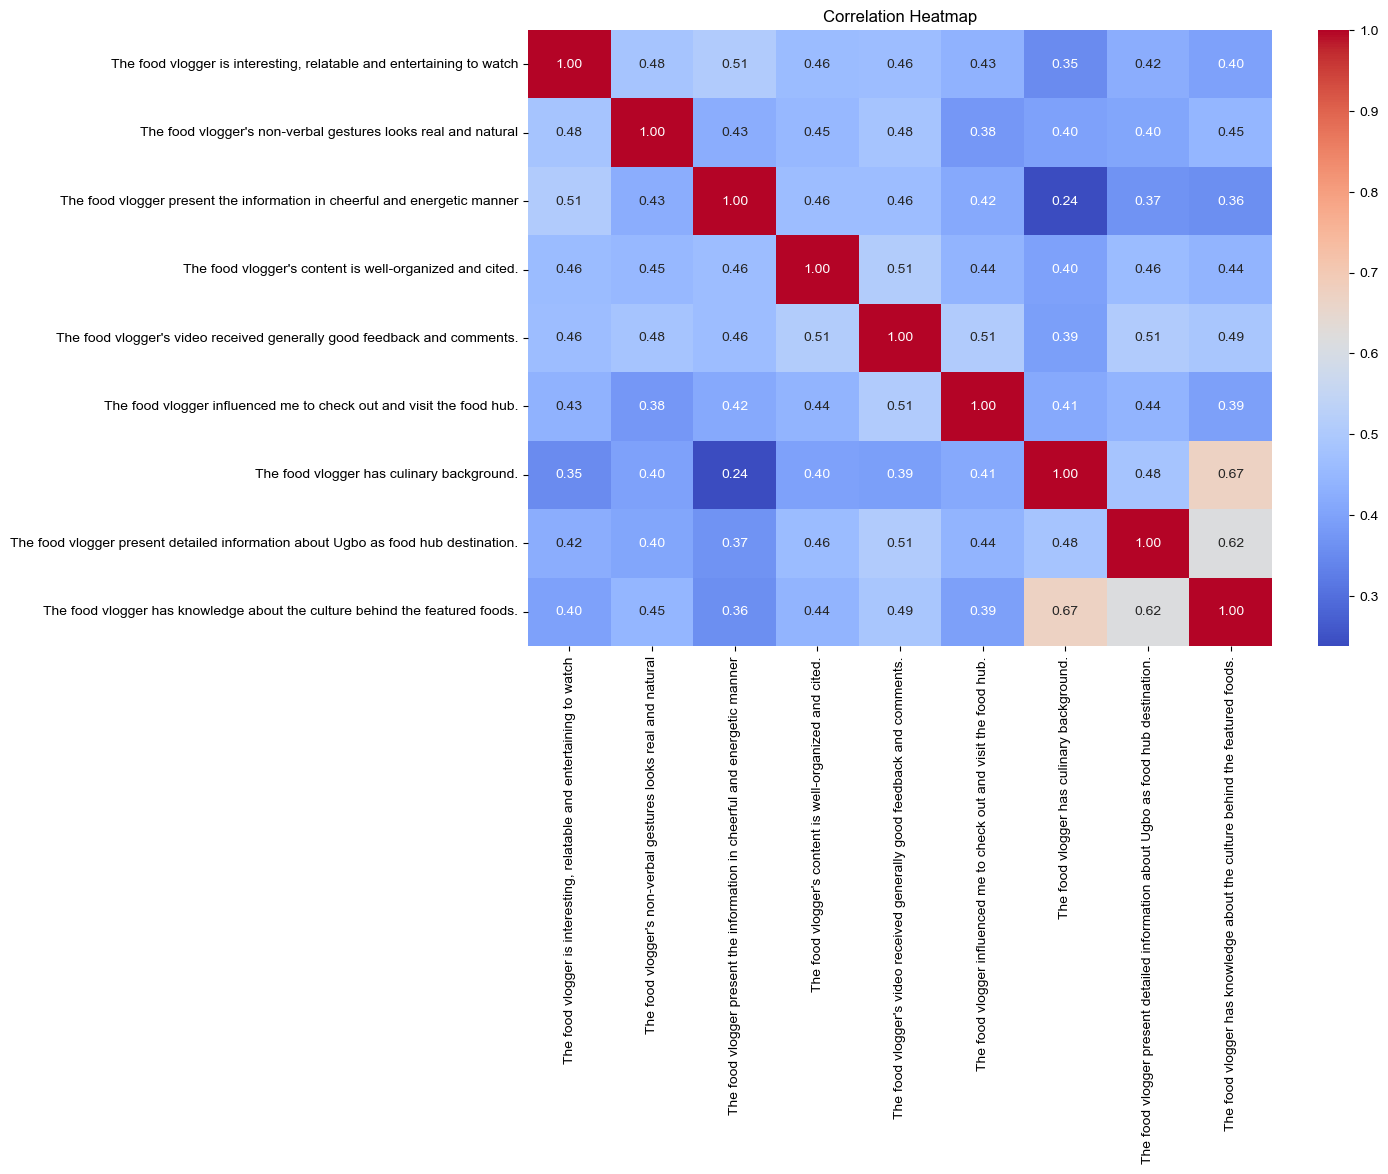


Top 3 Strong Positive Correlations:
The variables 'The food vlogger has knowledge about the culture behind the featured foods.' and 'The food vlogger has culinary background.' show a strong positive correlation: 0.67
The variables 'The food vlogger has knowledge about the culture behind the featured foods.' and 'The food vlogger present detailed information about Ugbo as food hub destination.' show a strong positive correlation: 0.62
The variables 'The food vlogger's video received generally good feedback and comments.' and 'The food vlogger's content is well-organized and cited.' show a strong positive correlation: 0.51

V. INDIVIDUAL ANALYSIS FOR ALL QUESTIONS


In [375]:
 ### import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from prettytable import PrettyTable
from scipy.stats import ttest_ind
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
from dash import dash_table
from scipy.stats import ttest_ind
from flask import Flask
from IPython.display import display, HTML
from dash import Dash
from dash.dash_table.Format import Group
from threading import Thread
from IPython.display import HTML
from IPython.display import Markdown, display

def load_survey_data(filename):
    try:
        return pd.read_excel(filename, header=0)
    except FileNotFoundError:
        return None
    except ValueError as e:
        print(f"Error: {e}")
        return None
    except Exception as e:
        print(f"Unexpected error: {e}")
        return None


def preprocess_data(data, num_personal_info_cols, choice, categorical_mappings):
    if num_personal_info_cols >= data.shape[1]:
        raise ValueError("Number of personal info columns exceeds total columns.")
        
    if choice == 1:
        data = data.dropna()
    elif choice == 2:
        for column in data.columns[num_personal_info_cols:]:
            if data[column].dtype == 'object':
                data[column].fillna(data[column].mode()[0], inplace=True)
            else:
                data[column].fillna(data[column].mean(), inplace=True)
    elif choice == 3:
        fill_value = input("Enter the value to fill missing data with: ")
        data = data.fillna(fill_value)

    # Convert non-numeric responses if present
    if categorical_mappings:
        for column in data.columns:
            if data[column].dtype == 'object':
                data[column] = data[column].map(categorical_mappings).fillna(data[column])

    return data



def analyze_personal_info(data, num_personal_info_cols):
    profile_analysis = {}
    for column in data.columns[:num_personal_info_cols]:
        counts = data[column].value_counts()
        total = len(data[column])
        percentages = (counts / total * 100).round(0).astype(int)
        profile_analysis[column] = pd.DataFrame({
            'Measure': counts.index,
            'Frequency': counts.values,
            'Percentage': percentages.astype(str) + '%'
        })
    return profile_analysis

def display_profile_table(profile_analysis, data):
    # Display Dash DataTable for profile analysis
    app = dash.Dash(__name__)

    app.layout = html.Div([
        html.Div([
            dcc.Dropdown(
                id='profile-dropdown',
                options=[{'label': column, 'value': column} for column in profile_analysis.keys()],
                value=list(profile_analysis.keys())[0]
            ),
            dash_table.DataTable(
                id='profile-table',
                columns=[
                    {'name': 'Measure', 'id': 'Measure'},
                    {'name': 'Frequency', 'id': 'Frequency'},
                    {'name': 'Percentage', 'id': 'Percentage'}
                ],
                style_table={'overflowX': 'auto'},
                style_cell={'minWidth': 95},
            ),
            html.Div([
                dcc.Graph(id='profile-pie-chart', style={'height': '350px', 'width': '800px'})
            ], style={'display': 'flex', 'justify-content': 'center'}),  # Center the pie chart
            html.Div(id='verbal-interpretation', style={'color': 'black', 'text-align': 'center', 'font-weight': 'bold'})
        ]),
    ])

    @app.callback(
        [Output('profile-table', 'data'), Output('verbal-interpretation', 'children'), Output('profile-pie-chart', 'figure')],
        [Input('profile-dropdown', 'value')]
    )
    def update_table(selected_column):
        df = profile_analysis[selected_column]

        # Find the response with the highest percentage
        highest_percentage_row = df[df['Percentage'] == df['Percentage'].max()]
        highest_percentage_response = highest_percentage_row.iloc[0]['Measure']
        highest_percentage = highest_percentage_row.iloc[0]['Percentage']

        # Find the response with the lowest percentage
        lowest_percentage_row = df[df['Percentage'] == df['Percentage'].min()]
        lowest_percentage_response = lowest_percentage_row.iloc[0]['Measure']
        lowest_percentage = lowest_percentage_row.iloc[0]['Percentage']

        # Create the verbal interpretation
        verbal_interpretation = html.Div([
            html.H3(f"VERBAL INTERPRETATION [Demographic 1 : {selected_column}]", style={'color': 'green', 'text-align': 'center', 'font-weight': 'bold'}),
            html.P(f"\nAccording to the result of '{selected_column}' demographics, '{highest_percentage_response}' has the highest number of respondents with {highest_percentage} while the lowest is '{lowest_percentage_response}' with {lowest_percentage}"),
        ])

        # Create pie chart
        fig = px.pie(df, values='Frequency', names='Measure', title=f'{selected_column} Distribution')

        return df.to_dict('records'), verbal_interpretation, fig

    app.run_server(port=8050, use_reloader=False)

        
def convert_categorical_to_numeric(data, categories):
    converted_data = data.copy()
    for category, mappings in categories.items():
        if category in converted_data.columns:
            converted_data[category] = converted_data[category].map(mappings)
    return converted_data
        
def interpret_verbal(mean, reverse_mapping):
    mean_rounded = round(mean)
    return reverse_mapping.get(mean_rounded, "No interpretation available")


def analyze_category(data, categories, num_personal_info_cols, reverse_categorical_mappings):
    category_analysis = {}
    overall_analysis = []
    overall_n = []
    for category, questions in categories.items():
        valid_questions = [q for q in questions if q in data.columns[num_personal_info_cols:]]
        if not valid_questions:
            print(f"Warning: No valid questions found for category '{category}'. Skipping this category.")
            continue

        category_data = data[valid_questions]
        n = len(category_data)
        mean = category_data.mean(numeric_only=True)
        std_dev = category_data.std(numeric_only=True)

        # Creating a list for the category analysis
        analysis_data = []
        
        #For each question and overall category
        for question in valid_questions:
            interpretation = interpret_verbal(mean[question], reverse_categorical_mappings)
            analysis_data.append([question, n, f"{mean[question]:.2f}", f"{std_dev[question]:.2f}", interpretation])

        # Calculate category averages
        total_mean = mean.mean()
        total_std_dev = std_dev.mean()
        total_interpretation = interpret_verbal(total_mean, reverse_categorical_mappings)
        analysis_data.append([f"{category} OVERALL", n, f"{total_mean:.2f}", f"{total_std_dev:.2f}", total_interpretation])
        category_analysis[category] = analysis_data

        # Collect data for overall analysis
        overall_n.append(n)
        if analysis_data:
            overall_analysis.append([category, n, f"{total_mean:.2f}", f"{total_std_dev:.2f}", total_interpretation])

    # Add overall row in overall analysis
    if overall_analysis:
        overall_avg_n = np.mean(overall_n)
        overall_means = np.mean([float(row[2]) for row in overall_analysis])
        overall_stdevs = np.mean([float(row[3]) for row in overall_analysis])
        overall_interpretation = interpret_verbal(overall_means, reverse_categorical_mappings)
        overall_analysis.append(["OVERALL", overall_avg_n, f"{overall_means:.2f}", f"{overall_stdevs:.2f}", overall_interpretation])

    return category_analysis, overall_analysis

import dash_html_components as html
html.Div(style={'height': '20px'})



def display_overall_analysis(overall_analysis):
    print("\n[OVERALL CATEGORY ANALYSIS]")
    headers = ["Category", "N", "Mean", "Standard Deviation", "Verbal Interpretation"]
    print(tabulate(overall_analysis, headers=headers, tablefmt="grid"))
    
def analyze_data(data):
    analysis = {
        'mean': data.mean(numeric_only=True),
        'median': data.median(numeric_only=True),
        'std_dev': data.std(numeric_only=True),
        'min': data.min(numeric_only=True),
        'max': data.max(numeric_only=True)
    }
    return analysis

def interpret_results(analysis):
    interpretation = []
    for key, value in analysis.items():
        formatted_value = f"{value:.2f}" if isinstance(value, (int, float)) else value
        interpretation.append(f"{key.title()}: {formatted_value}")
    return '\n'.join(interpretation)

def prompt_for_correlational_analysis():
    response = input("Do you want to analyze the correlation between categories and personal information? (yes/no): ").lower()
    return response == 'yes'

def select_personal_info_for_analysis(data, num_personal_info_cols):
    print("\nList of Personal Information Options:")
    for i, column in enumerate(data.columns[:num_personal_info_cols], start=1):
        print(f"{i}. {column}")
    selected_indices = input("Enter the indices of personal information for analysis (separated by commas): ")
    selected_columns = [data.columns[int(index.strip()) - 1] for index in selected_indices.split(',') if index.strip().isdigit()]
    return selected_columns

def analyze_significant_differences(data, categories, num_personal_info_cols):
    significant_differences = []

    # Select personal info columns for analysis
    personal_info_columns = data.columns[:num_personal_info_cols]

    for personal_info_column in personal_info_columns:
        for category, questions in categories.items():
            t_values = []
            p_values = []

            # Filter out non-numeric columns
            numeric_questions = [question for question in questions if pd.api.types.is_numeric_dtype(data[question])]

            for question in numeric_questions:
                # Perform t-test for each question and personal info combination
                t_stat, p_value = ttest_ind(data[personal_info_column], data[question])
                t_values.append(t_stat)
                p_values.append(p_value)

            # Calculate the mean and standard deviation of t-values and p-values
            mean_t_value = np.mean(t_values)
            std_dev_t_value = np.std(t_values)
            mean_p_value = np.mean(p_values)
            std_dev_p_value = np.std(p_values)

            # Append results to significant_differences list
            significant_differences.append({
                'Category': category,
                'Personal Info/Demographic': personal_info_column,
                'N': len(data),
                'Mean T-Value': mean_t_value,
                'Std Deviation T-Value': std_dev_t_value,
                'Mean P-Value': mean_p_value,
                'Std Deviation P-Value': std_dev_p_value
            })

    return significant_differences

def display_significant_differences_table(significant_differences):
    # Display Dash DataTable for significant differences analysis
    app = dash.Dash(__name__)

    app.layout = html.Div([
        dcc.Dropdown(
            id='significant-differences-dropdown',
            options=[{'label': col, 'value': col} for col in significant_differences[0].keys()],
            multi=False,
            value='Personal Info/Demographic'
        ),
        dash_table.DataTable(
            id='significant-differences-table',
            columns=[
                {'name': 'Category', 'id': 'Category'},
                {'name': 'Personal Info/Demographic', 'id': 'Personal Info/Demographic'},
                {'name': 'N', 'id': 'N'},
                {'name': 'Mean T-Value', 'id': 'Mean T-Value'},
                {'name': 'Std Deviation T-Value', 'id': 'Std Deviation T-Value'},
                {'name': 'Mean P-Value', 'id': 'Mean P-Value'},
                {'name': 'Std Deviation P-Value', 'id': 'Std Deviation P-Value'}
            ],
            style_table={'overflowX': 'auto'},
            style_cell={'minWidth': 95},
            filter_action='native',
            sort_action='native',
            sort_mode='multi',
        ),
    ])

    @app.callback(
        Output('significant-differences-table', 'data'),
        Input('significant-differences-dropdown', 'value')
    )
    def update_significant_differences_table(selected_column):
        return sorted(significant_differences, key=lambda x: x[selected_column])

    app.run_server(port=8051, use_reloader=False)

def run_interactive_dashboard(cleaned_data, data):
    app = dash.Dash(__name__)

    app.layout = html.Div([
        dcc.Dropdown(
            id='question-dropdown',
            options=[{'label': q, 'value': q} for q in data.columns],
            value=data.columns[0]
        ),
        dcc.Graph(id='question-graph'),
        html.Div(id='verbal-interpretation', style={'color': 'black', 'text-align': 'center', 'font-weight': 'bold'})
    ])

    @app.callback(
        [Output('question-graph', 'figure'), Output('verbal-interpretation', 'children')],
        [Input('question-dropdown', 'value')]
    )
    def update_graph(selected_question):
        filtered_data = data[selected_question].value_counts()
        fig = px.bar(filtered_data, x=filtered_data.index, y=filtered_data.values, labels={'x': selected_question, 'y': 'Counts'})
        
        # Generate the verbal interpretation based on the selected question
        interpretation = generate_verbal_interpretation(selected_question)
        
        return fig, interpretation

    app.run_server(port=8053, use_reloader=False)
    


def generate_verbal_interpretation(selected_question):
    # Customize the interpretation based on the selected question
    if selected_question == 'YourQuestion1':
        return html.P("Verbal interpretation for YourQuestion1: This is a sample interpretation.")
    elif selected_question == 'YourQuestion2':
        return html.P("Verbal interpretation for YourQuestion2: This is another sample interpretation.")
    else:
        return html.P("No verbal interpretation available for the selected question.")

    
def display_menu():
    menu = """
    <h2 style='color:green; font-weight:bold;'>PROGRAM CAPABILITIES</h2>
    <p><b>1. DEMOGRAPHICS OF THE RESPONDENTS</b></p>
    <p>- Create an interactive table displaying demographics data for respondents, including age, gender, and location. Show measures, frequency, and percentages.</p>
    <p><b>2. CATEGORY/FACTOR ANALYSIS</b></p>
    <p>- Analyze questions that measure a single factor or category. Provide the titles and questions under each factor/category as an example.</p>
    <p><b>3. SIGNIFICANT DIFFERENCES BETWEEN DATAS</b></p>
    <p>- Examine if there are significant differences between respondent demographics and their responses within each factor/category.</p>
    <p><b>4. CORRELATIONAL ANALYSIS</b></p>
    <p>- Investigate the presence of positive relationships between survey questions and between factors/categories. Generate a heatmap and highlight the top 3 strong positive relationships.</p>
    <p><b>5. INDIVIDUAL ANALYSIS FOR ALL QUESTIONS</b></p>
    <p>- Perform an individual analysis of all survey questions, presenting them with interactive charts for comprehensive insights.</p>
    """

    # Display the menu
    display(HTML(menu))

    # Get user's selection
    while True:
        selected_analysis = input("\nSelect the analysis you want to perform (e.g., '1' for Profile of the Respondents, '1,2,3' for multiple analyses, or 'all' for all analyses): ").lower()

        if selected_analysis == 'all' or all(char.isdigit() and 1 <= int(char) <= 5 or char == ',' for char in selected_analysis):
            break
        else:
            print("Error: Invalid input. Please enter a digit from 1 to 5, digits from 1 to 5 separated by a comma, or 'all'.")
            print("Example: '1', '2,3', 'all'")

    return selected_analysis




def display_survey_questions(data, num_personal_info_cols):
    # Display survey questions
    print("\n[List of Survey Questions]")
    for i, question in enumerate(data.columns[num_personal_info_cols:], start=1):
        print(f"{i}. {question}")

def display_usage_guidelines():
    while True:
        guidelines = """
        <h2 style='color:green; font-weight:bold;'>USAGE GUIDELINES:</h2> 
        <b>Kindly adhere to the following recommendations to minimize errors and achieve the utmost precision in your outcomes.</b>
        <br><br>
        1. File Format: Ensure your survey data is in Excel format (.xlsx).<br>
        2. The format of your excel datasets should be presented as follows:<br>
        """
        
        # Define the sample data as a list of dictionaries
        sample_data = [
            {"Age": 15, "Gender": "Male", "Location": "Manila", "RTU is a Good School": "Agree", "The Facility of RTU is promising": "Strongly Agree", "BS Satatistics is Easy": "Disagree"},
            {"Age": 18, "Gender": "Female", "Location": "Cavite", "RTU is a Good School": "Disagree", "The Facility of RTU is promising": "Agree", "BS Satatistics is Easy": "Strongly Agree"}
        ]

        # Generate a formatted table from the sample data
        table = tabulate(sample_data, headers="keys", tablefmt="html")

        # Append the table to the guidelines
        guidelines += table

        # Add an explanation
        guidelines += """
        <p>The first columns in your Excel file should contain demographic or personal information, like Age, Gender, Location, etc.. The remaining columns should contain survey questions</p>
        <p>In the example data above, the first three (3) columns are reserved for demographic information (Age, Gender, Location). All columns following these initial three columns are dedicated to survey questions.\n</p>
        """

        # Continue with the rest of the guidelines
        guidelines += """
        <p>3. Import Libraries: Make sure to import the required libraries at the beginning of your code.<br>
        4. Categorical Mappings: If your survey contains non-numeric responses, consider creating mappings to convert them to numeric values.<br>
        5. Interactive Dashboards: Some analysis options provide interactive dashboards. Use dropdown menus and graphs to explore data interactively.<br>
        6. Run the code and follow the prompts and instructions.<br>
        7. Enjoy Exploring Your Survey Data: This automation code simplifies survey data analysis, allowing you to gain valuable insights efficiently.<br><br>
        Have you read and taken into account the provided instructions? Please respond with 'yes' or 'no':
        """
        display(HTML(guidelines))
        response = input().strip().lower()
        if response == 'yes':
            return True
        elif response == 'no':
            print("\033[91m\033[1m\nPlease review and follow the provided instructions before proceeding.")
            print("If you are having trouble following the instructions or need assistance, you can contact the creators through the contact information provided in the user manual.\033[0m")
        else:
            print("\033[91m\033[1m\nInvalid response. Please respond with 'yes' or 'no'.\033[0m")
            
def display_categorical_mappings():
    response = input("Does the survey contain non-numeric responses such as satisfaction levels (e.g., 'Very Satisfied', 'Satisfied', 'Neutral', 'Dissatisfied')? (yes/no): ").lower()
    
    # Example data for non-numeric response conversion
    mapping_data = [
        ['Very Satisfied', 4],
        ['Satisfied', 3],
        ['Neutral', 2],
        ['Dissatisfied', 1]
    ]

    # Generate an HTML table from the data
    html_table = tabulate(mapping_data, headers=['Non-numeric', 'Numeric Equivalent'], tablefmt='html')

    # Style the table
    styled_html_table = f"""
    <style>
        table {{
            border-collapse: collapse;
            width: 100%;
        }}
        th, td {{
            border: 1px solid #ddd;
            padding: 8px;
            text-align: left;
        }}
        th {{
            background-color: #f2f2f2;
        }}
    </style>
    <h2 style='color:green; font-weight:bold;'>Non-numeric Response Conversion Table Example:</h2>
    {html_table}
    <p>This is just an example. You should create a mapping based on your own survey responses.</p>
    """
    
    display(HTML(styled_html_table))
    
    while True:

        if response in ['yes', 'no']:
            break
        else:
            print("Error: Invalid input. Please enter 'yes' or 'no'.")
    
    return response


def display_analysis_instructions():
    # Display instructions for analysis selection
    
    analysis_instructions= """
    print("\n[ANALYSIS SELECTION INSTRUCTIONS]")
    print("1. Enter the number corresponding to the analysis you want to perform.")
    print("2. If selecting multiple analyses, separate the numbers by commas (e.g., '1,2,3').")
    print("3. To perform all analyses, enter 'all'.")
    print("4. You can customize the order by entering the numbers in your desired sequence.")
    """
    display(HTML(analysis_instructions))
    
    # Get user's selection
    while True:
        selected_analysis = input("\nSelect the analysis you want to perform (e.g., '1' for Profile of the Respondents, '1,2,3' for multiple analyses, or 'all' for all analyses): ").lower()

        if selected_analysis == 'all' or all(char.isdigit() or char == ',' for char in selected_analysis):
            break
        else:
            print("Error: Invalid input. Please enter 'all' or a comma-separated list of analysis numbers.")

    return selected_analysis

def display_analysis_heading(title):
    # Display the analysis heading in bold and highlighted format
    print(f"\n\033[1;37;40m\033[6;30;42m{title}\033[m")

def display_instructions_above_questions():
    # Display instructions above the list of survey questions
    print("\n[INSTRUCTIONS]")
    print("Enter the question numbers you want to analyze, separated by commas.")
    print("For example, '1,2,3' will analyze the responses to questions 1, 2, and 3.")

def display_title(title):
    # Display the title of the program
    console_width = 140
    print(title.center(console_width), "\n")


from IPython.display import HTML, Markdown, display
from tabulate import tabulate  # Assuming you have tabulate installed
# Import other necessary libraries as needed

from IPython.display import display, HTML, Markdown

def main():
    title = "<h1 style='color:white; background-color:green; font-size:24px; padding:10px; text-align:center;'>SURVEY DATA ANALYSIS AUTOMATION SYSTEM</h1>"
    display(HTML(title))

    # Display usage guidelines and confirm if the user understands them
    if not display_usage_guidelines():
        return

    instructions = """
    <p style='font-family:Arial;'><b>INSTRUCTION:</b> Please ensure you have the directory path of your survey data file.</p>
    <p style='font-family:Arial;'>Your file should be in Excel (.xlsx) format. For example: 'C:/Users/YourName/Documents/survey_data.xlsx'</p>
    <p style='font-family:Arial;'>For guidance on how to find your file's directory, visit: <a href='https://www.datanumen.com/blogs/3-effective-methods-to-get-the-path-of-the-current-excel-workbook/'>here</a>.</p>
    """
    display(HTML(instructions))

    while True:
        try:
            filename = input("Enter the directory path of your survey data file: ")
            data = load_survey_data(filename)
            if data is None:
                raise ValueError("No data loaded. Please check your file path and ensure it's an Excel file. Please try again.")
            break
        except ValueError as e:
            display(Markdown(f"**Error:** {e}"))



    if data is not None:
        while True:
            try:
                num_personal_info_cols = int(input("Enter the number of columns with demographics of the respondents [for example, age, gender, and/or location]: "))
                if num_personal_info_cols < 1 or not isinstance(num_personal_info_cols, int):
                    raise ValueError("<font color='red'><b>Error:</b></font>")
                break
            except ValueError as e:
                display(Markdown(f"\n<font color='red'><b>Error:</b> Number of personal info/demographics columns should be greater than 0 and less than the total columns. Please enter a valid number.</font>"))

        while True:
            try:
                choice = int(input("Choose how to handle missing data (1: Drop, 2: Fill with mean/mode, 3: Fill with a value): "))
                if choice not in [1, 2, 3]:
                    raise ValueError("Invalid choice. Please enter 1, 2, or 3. \033[91m")
                break
            except ValueError as e:
                print(f"Error: {e}\nPlease enter a valid choice (1, 2, or 3). \033[91m")
        
        cleaned_data = preprocess_data(data, num_personal_info_cols, choice, {})

        # Get user's analysis selection
        selected_analysis = display_menu()

        # Map non-numeric responses to numeric values
        response = display_categorical_mappings()
        categorical_mappings = {}
        if response == 'yes':
            print("Please provide a numeric equivalent for each non-numeric response in your survey and input here individually:")
            while True:
                cat_response = input("Enter a non-numeric response (or 'done' to finish): ")
                if cat_response.lower() == 'done':
                    break
                numeric_value = int(input(f"Numeric value for '{cat_response}': "))
                categorical_mappings[cat_response] = numeric_value

        cleaned_data = preprocess_data(data, num_personal_info_cols, choice, categorical_mappings)
        # Display analysis based on user's selection
        if '1' in selected_analysis or 'all' in selected_analysis:
            display_analysis_heading("I. PROFILE OF THE RESPONDENTS")
            print()

            # Display all tables for personal information or profile of the respondents
            profile_analysis = analyze_personal_info(cleaned_data, num_personal_info_cols)
            display_profile_table(profile_analysis, data)
            # Display interactive table, charts, and verbal interpretation

        # Add a newline after the "CATEGORY/FACTOR ANALYSIS" section heading
        if '2' in selected_analysis or 'all' in selected_analysis:
            print()  # Add a newline to separate sections
            display_analysis_heading("II. CATEGORY/FACTOR ANALYSIS")

            # Display survey questions
            print("\nList of Survey Questions:")
            for i, question in enumerate(cleaned_data.columns[num_personal_info_cols:], start=1):
                print(f"{i}. {question}")

            # Ask for categories and questions under each category
            categories = {}
            print("\nEnter categories and corresponding questions.")
            while True:
                category_name = input("Enter the category name (or 'done' to finish): ")
                if category_name.lower() == 'done':
                    break
                question_nums = input(f"Enter numbers for '{category_name}' category questions (separated by commas): ")
                question_indices = [int(num.strip()) - 1 for num in question_nums.split(',') if num.strip().isdigit()]
                questions = [cleaned_data.columns[num_personal_info_cols + i] for i in question_indices]
                categories[category_name] = questions

            # Define reverse_categorical_mappings here if necessary
            reverse_categorical_mappings = {
                1: 'Low',
                2: 'Medium',
                3: 'High',
                4: 'Very High'
            }

            if categories:
                category_analysis, overall_analysis = analyze_category(cleaned_data, categories, num_personal_info_cols,
                                                                      reverse_categorical_mappings)
                display_category_analysis(category_analysis, overall_analysis, data)

        if '3' in selected_analysis or 'all' in selected_analysis:
            display_analysis_heading("III. SIGNIFICANT DIFFERENCES BETWEEN PROFILE OF THE RESPONDENTS AND SURVEY RESPONSES")


        if '4' in selected_analysis or 'all' in selected_analysis:
            display_analysis_heading("IV. CORRELATIONAL ANALYSIS")

            # Display the correlation heatmap
            display_correlation_heatmap(cleaned_data, num_personal_info_cols)

        if '5' in selected_analysis or 'all' in selected_analysis:
            display_analysis_heading("V. INDIVIDUAL ANALYSIS FOR ALL QUESTIONS")

            # Run interactive dashboard
            run_interactive_dashboard(cleaned_data, data)
            
if __name__ == "__main__":
    main()